Unsupervised Learning :-- Unsupervised learning is a type of machine learning where the model is trained on data that has no labels, and the goal is to automatically discover patterns, structures, or relationships within that data.

👉What it really means

No target variable

No output labels

The algorithm groups, compresses, or identifies patterns in the data based only on the input features.::::

In [9]:
# importing in-built dataset
from sklearn.datasets import load_iris

#arranging it into dataframe using pandas

import pandas as pd
df = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)


In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df.isnull().sum()   ## no null values are present

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0


In [12]:
df.duplicated().sum()  ## duplicated value present

df[df.duplicated()]  ## printing the duplicated row

df.drop_duplicates(inplace=True)  ## dropping the duplicated row

**K-MEANS CLUSTERING**

In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
k_means_labels = kmeans.fit_predict(df)

# Evaluation of K-Means
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df, k_means_labels)

print(f"k-means clustering :{silhouette_avg:.2f}")

k-means clustering :0.55


**HIERARCHICAL CLUSTERING**

In [28]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
hc_labels = hc.fit_predict(df)

# Evaluate Hierarchical Clustering
hc_silhouette = silhouette_score(df, hc_labels)
print(f"Hierarchical Silhouette Score:{hc_silhouette:.2f}")

Hierarchical Silhouette Score:0.56


**PCA FOR VISUALIZATION**

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)

print(f"Explained Variance by PCA Components: {pca.explained_variance_ratio_[0]:.2f}, {pca.explained_variance_ratio_[1]:.2f}")

Explained Variance by PCA Components: 0.92, 0.05


**VISUALIZE K-MEANS CLUSTERSt**

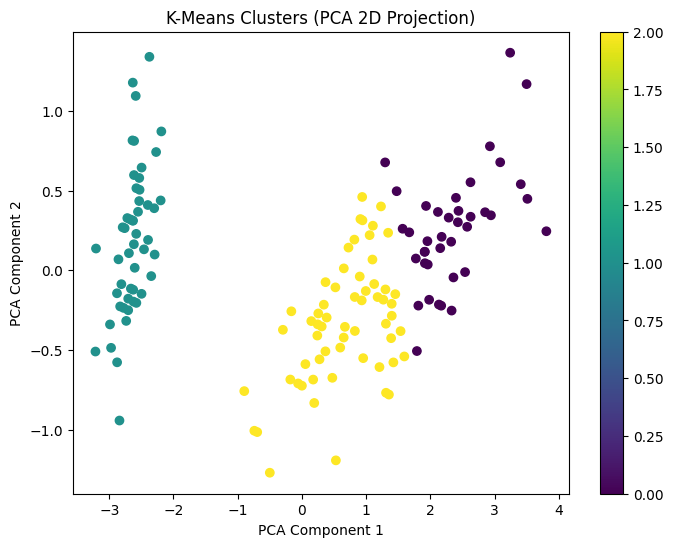

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=k_means_labels, cmap='viridis')
plt.title("K-Means Clusters (PCA 2D Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar()
plt.show()

**VISUALIZE HIERARCHICAL CLUSTERS**

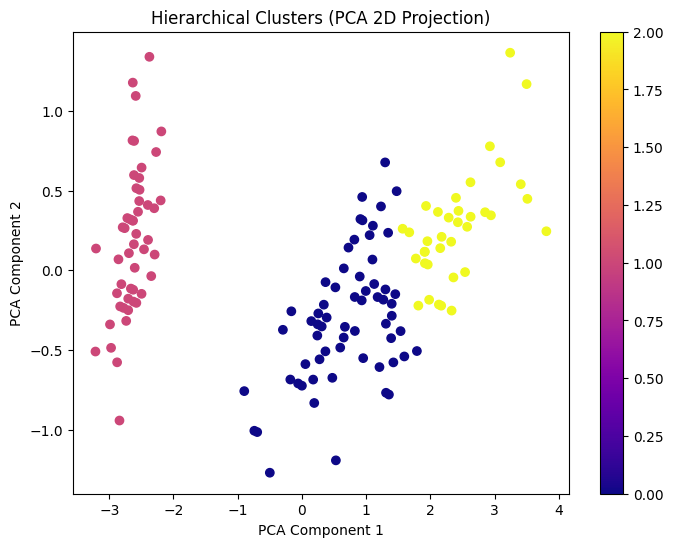

In [38]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=hc_labels, cmap='plasma')
plt.title("Hierarchical Clusters (PCA 2D Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar()
plt.show()

**How to Recognize Which Model Performs Best

Since this is unsupervised learning, we don't use accuracy or precision.
We use the Silhouette Score.

🔹 Silhouette Score Range:

+1 → Perfectly separated clusters

0.5 to 1 → Very good clustering

0.2 to 0.5 → Moderate clustering

0 to 0.2 → Weak structure

< 0 → Wrong clustering


K-Means Silhouette Score: 0.5536   &&    Hierarchical Silhouette Score: 0.5565
                                                                
✔️ Conclusion

Hierarchical clustering performs slightly better
because 0.5565 > 0.5536